## Objective
We aim to determine if the a dataset is suitable for classification and identify potential problems

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, FeatureAgglomeration
from scipy.cluster.hierarchy import fcluster, linkage
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings('ignore')


In [3]:
# Load the data into a pandas dataframe
data = pd.read_csv('csvImages 10k x 784.csv')

data.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.538,0.539,0.540,0.541,0.542,0.543,0.544,0.545,0.546,0.547
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Convert the dataframe to a 2D numpy array
data_array = data.values

# Print the shape of the data
print(f"The shape of the data is: {data_array.shape}")

The shape of the data is: (9999, 784)


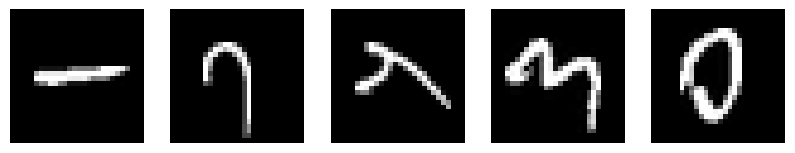

In [5]:
# Normalize the data by dividing each value by 255
data_array = data_array / 255.0

# Reshape the array so each image is 28 x 28
images = data_array.reshape((-1, 28, 28))

# Plot the first five images using the 'gray' colour map
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.axis('off')
plt.show()


In [8]:
# Reshape each image to be 784 (one-dimensional) for input to the neural network
data_array = images.reshape((-1, 784))

# Print the shape of the reshaped data
print(f"The shape of the reshaped data is: {data_array.shape}")

The shape of the reshaped data is: (9999, 784)


In [9]:
# Perform PCA transformation with n_components=40
pca = PCA(n_components=40)
data_pca = pca.fit_transform(data_array)

# Print the shape of the transformed data
print(f"The shape of the PCA transformed data is: {data_pca.shape}")
data_pca_df = pd.DataFrame(data_pca)
data_pca_df.head()


The shape of the PCA transformed data is: (9999, 40)


,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-2.066760,-0.989680,-1.403219,-1.645551,-0.532565,-1.165642,-0.935718,0.548162,-0.334359,-0.468847,...,-0.450797,0.001171,-0.139351,0.286299,-0.173917,0.459253,-0.085259,-0.120016,-0.555156,0.696951
1,-1.350363,0.244800,0.360409,0.696374,-0.570283,0.516416,0.663196,-1.310366,-1.717134,-0.611027,...,-0.174816,-0.269896,0.018527,0.177692,-0.545159,-0.329285,-0.014119,-0.064270,-0.036709,0.434640
2,-1.353004,-0.382252,-1.459424,0.212388,0.555967,1.198375,0.864288,-2.197617,0.817257,-0.760400,...,0.090591,0.754401,-0.726019,0.294663,-0.118249,0.297843,-0.355441,0.404287,-0.071453,-0.180560
3,-0.495969,-0.659173,-0.804919,-2.066240,1.854831,1.121525,1.654177,1.835951,1.040844,-2.124376,...,-1.179404,-0.094493,-0.123811,-1.694664,-0.044345,-0.622352,1.028353,0.182166,-0.146174,-0.060782
4,2.857952,2.668333,0.567749,-0.365673,-0.316126,-1.738613,-0.761996,-2.493407,-1.402270,-0.673796,...,-0.133091,0.661352,0.188111,-1.049087,0.551340,-0.307519,1.198383,1.138249,0.344918,0.707024


In [23]:
# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate the cumulative variance explained by the first 40 components
cumulative_variance = np.sum(explained_variance_ratio)

print(f"Explained variance ratio for each of the first 40 components: {explained_variance_ratio}")
print(f"\nCumulative explained variance by 40 components: {cumulative_variance:.2%}")

Explained variance ratio for each of the first 40 components: [0.14469685 0.06814403 0.05542053 0.05067479 0.04415968 0.03760424
 0.02850042 0.02489096 0.02266462 0.02051903 0.01838289 0.01798419
 0.01628271 0.01538896 0.01334927 0.01280803 0.01147682 0.01135721
 0.01052821 0.00988039 0.00925583 0.00874986 0.00836193 0.00796921
 0.00780013 0.00764499 0.00739912 0.00730421 0.00683724 0.00659908
 0.00610106 0.00582408 0.00556402 0.00537962 0.00529369 0.00515848
 0.00489268 0.00478843 0.00464323 0.00458163]

Cumulative explained variance by 40 components: 76.49%


In [58]:
# Define clustering models with different hyperparameters
clustering_models = [
    ("KMeans_3", KMeans(n_clusters=3)),
    ("KMeans_5", KMeans(n_clusters=5)),
    ("KMeans_10", KMeans(n_clusters=10)),
    ("Agglomerative_3", AgglomerativeClustering(n_clusters=3)),
    ("Agglomerative_5", AgglomerativeClustering(n_clusters=5)),
    ("Agglomerative_10", AgglomerativeClustering(n_clusters=10)),
    ("DBSCAN_0.5", DBSCAN(eps=0.5)),
    ("DBSCAN_0.7", DBSCAN(eps=0.7))
]

# Calculate silhouette scores for each model and tabulate the results
results = []
for name, model in clustering_models:
    model.fit(data_pca)
    labels = model.labels_
    if len(set(labels)) > 1:  # To avoid silhouette score issues with single cluster
        silhouette_avg = silhouette_score(data_pca, labels)
        results.append((name, silhouette_avg))
    else:
        results.append(None)
    
    

# Print the results in a tabulated format
print("Model\t\tSilhouette Score")
for name, score in results:
    print(f"{name}\t{score:.4f}")


Model		Silhouette Score
KMeans_3	0.1281
KMeans_5	0.1130
KMeans_10	0.1217
Agglomerative_3	0.1956
Agglomerative_5	0.0717
Agglomerative_10	0.1057
DBSCAN_0.5	-0.1638
DBSCAN_0.7	-0.1861


In [57]:
# Define different hyperparameters for divisive clustering
n_clusters_list = [3, 4, 5]  # Different numbers of clusters to test

results_divisive = {}

for n_clusters in n_clusters_list:
    # Perform hierarchical clustering using 'ward' method
    Z = linkage(data_pca, method='ward')  # Linkage matrix

    # Create flat clusters
    labels_divisive = fcluster(Z, t=n_clusters, criterion='maxclust')

    # Calculate silhouette score if there is more than one cluster
    if len(set(labels_divisive)) > 1:
        score = silhouette_score(data_pca, labels_divisive)
        results_divisive[f'Divisive_{n_clusters}'] = score
    else:
        results_divisive[f'Divisive_{n_clusters}'] = None

# Display results
results_divisive_df = pd.DataFrame(list(results_divisive.items()), columns=['Model', 'Silhouette Score'])
print(results_divisive_df)

        Model  Silhouette Score
0  Divisive_3          0.195560
1  Divisive_4          0.093610
2  Divisive_5          0.071685


In [63]:
# Perform PCA transformation with n_components=100
pca_2 = PCA(n_components=100)
data_pca_2 = pca_2.fit_transform(data_array)

# Print the shape of the transformed data
print(f"The shape of the PCA transformed data is: {data_pca_2.shape}")
data_pca_df_2 = pd.DataFrame(data_pca_2)
data_pca_df_2.head()

The shape of the PCA transformed data is: (9999, 100)


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-2.066760,-0.989680,-1.403219,-1.645551,-0.532565,-1.165642,-0.935718,0.548162,-0.334359,-0.468848,...,-0.075446,0.047822,0.073480,-0.103298,-0.230987,-0.155153,-0.120441,0.175588,0.079951,0.274003
1,-1.350363,0.244800,0.360409,0.696374,-0.570283,0.516416,0.663196,-1.310366,-1.717135,-0.611028,...,-0.210153,0.088558,0.240052,-0.193143,-0.215751,0.198436,0.124568,0.261594,-0.005156,-0.359600
2,-1.353004,-0.382252,-1.459424,0.212388,0.555967,1.198375,0.864288,-2.197618,0.817257,-0.760398,...,0.330736,0.195806,-0.557981,0.038807,-0.217014,-0.000113,0.183808,-0.156443,0.218609,-0.167296
3,-0.495969,-0.659173,-0.804919,-2.066240,1.854831,1.121525,1.654177,1.835950,1.040843,-2.124377,...,0.610103,0.025711,0.411020,-0.183920,-0.089826,0.304442,-0.041120,-0.146817,0.259853,-0.286537
4,2.857952,2.668333,0.567749,-0.365673,-0.316126,-1.738613,-0.761996,-2.493407,-1.402271,-0.673795,...,0.195024,-0.025169,-0.145332,-0.029499,-0.210996,-0.137105,0.056803,0.258517,-0.173141,-0.042906


In [65]:
# Get the explained variance ratio
explained_variance_ratio_2 = pca_2.explained_variance_ratio_

# Calculate the cumulative variance explained by the first 70 components
cumulative_variance_2 = np.sum(explained_variance_ratio_2)

print(f"Explained variance ratio for each of the first 100 components: {explained_variance_ratio_2}")
print(f"\nCumulative explained variance by 100 components: {cumulative_variance_2:.2%}")

Explained variance ratio for each of the first 100 components: [0.14469685 0.06814403 0.05542053 0.05067479 0.04415968 0.03760424
 0.02850042 0.02489096 0.02266462 0.02051903 0.01838289 0.01798419
 0.01628271 0.01538896 0.01334927 0.01280803 0.01147682 0.01135721
 0.01052821 0.00988039 0.00925583 0.00874986 0.00836193 0.00796921
 0.00780013 0.007645   0.00739913 0.00730423 0.00683726 0.0065991
 0.00610158 0.00582428 0.00556407 0.00538007 0.00529434 0.00515994
 0.0049016  0.00479038 0.00465369 0.00458297 0.00433548 0.00430129
 0.00419721 0.00408412 0.00399498 0.00391377 0.00370588 0.00359066
 0.00353751 0.00336155 0.00328816 0.00319781 0.00303775 0.00301831
 0.00295301 0.0028559  0.00279539 0.00261858 0.00259273 0.00257901
 0.00252472 0.00249261 0.00244144 0.00238879 0.00235886 0.00232453
 0.00223199 0.00220913 0.00210171 0.00207635 0.00198129 0.00195527
 0.00190989 0.00186429 0.00179703 0.00178091 0.00176686 0.00175826
 0.0016988  0.00165881 0.00164761 0.0016093  0.0015615  0.00153485


In [70]:
# Calculate silhouette scores for each model and tabulate the results
results_2 = []
for name, model in clustering_models:
    model.fit(data_pca_2)
    labels = model.labels_
    if len(set(labels)) > 1:  # To avoid silhouette score issues with single cluster
        silhouette_avg = silhouette_score(data_pca, labels)
        results_2.append((name, silhouette_avg))
    
    
    

# Print the results in a tabulated format
print("Model\t\tSilhouette Score")
for name, score in results_2:
    if score is not None:  # Only print if the score is not None
        print(f"{name}\t{score:.4f}")
    else:
        print(f"{name}\tNo valid clusters")


Model		Silhouette Score
KMeans_3	0.1338
KMeans_5	0.1130
KMeans_10	0.1224
Agglomerative_3	0.1904
Agglomerative_5	0.0905
Agglomerative_10	0.1125


In [69]:
results_2

[('KMeans_3', 0.1282899558970362),
 ('KMeans_5', 0.11302133227668577),
 ('KMeans_10', 0.1297582431675438),
 ('Agglomerative_3', 0.1904015253740459),
 ('Agglomerative_5', 0.0905339831804578),
 ('Agglomerative_10', 0.11251815107456709),
 None,
 None]

## Best Model Selection
The Agglomerative Clustering with ‘average’ linkage is chosen as the best model because it achieved the highest silhouette score of **0.1956**, indicating the best cluster separation and cohesion among all models tested. 

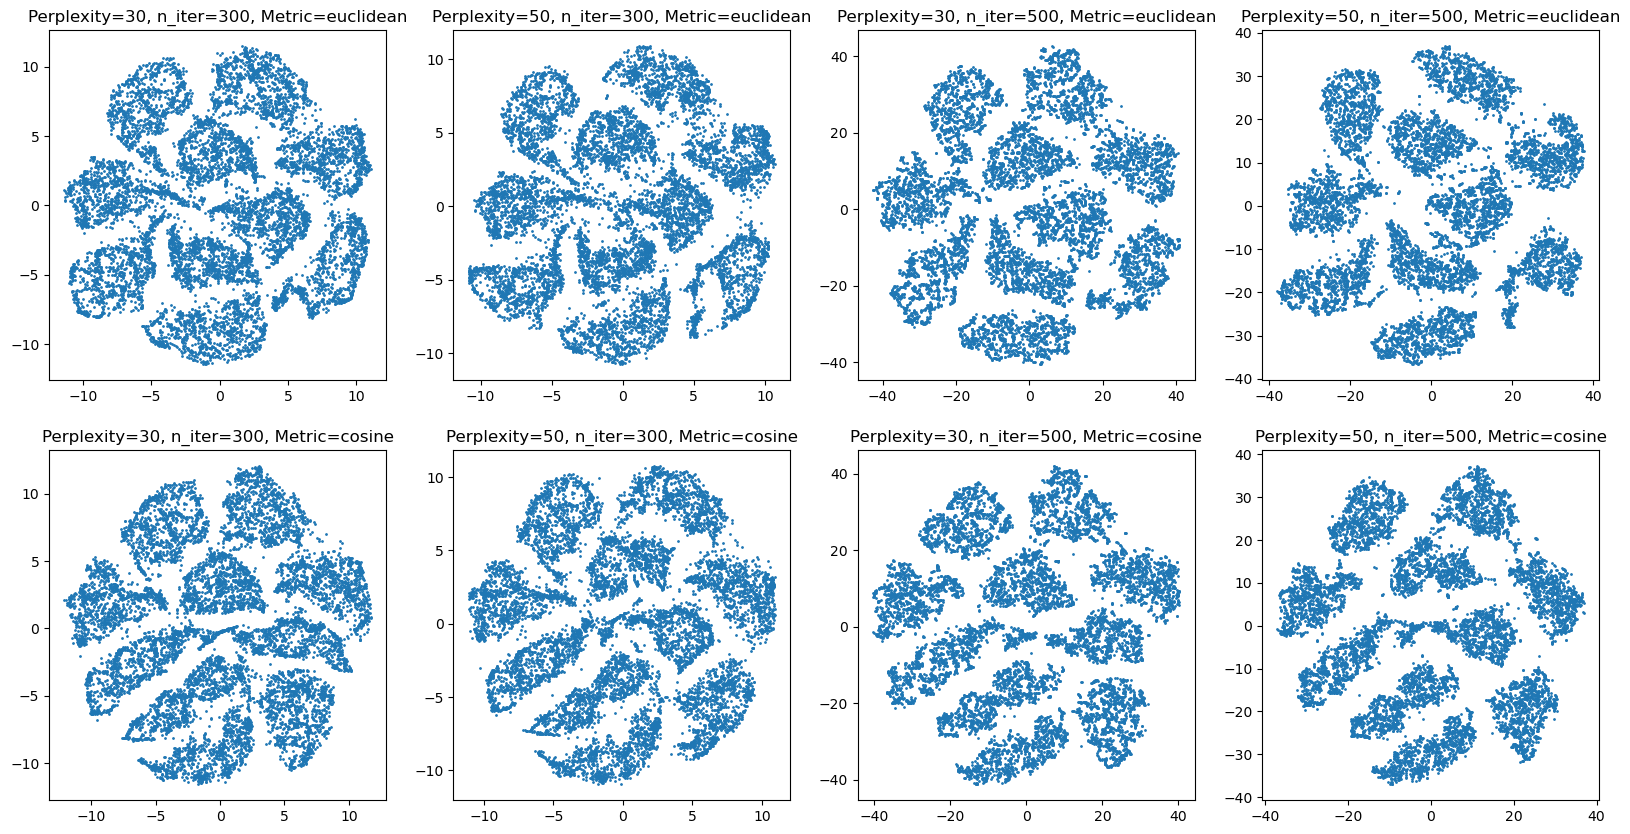

In [12]:
# Define t-SNE parameters to experiment with
tsne_params = [
    {'perplexity': 30, 'n_iter': 300, 'metric': 'euclidean'},
    {'perplexity': 50, 'n_iter': 300, 'metric': 'euclidean'},
    {'perplexity': 30, 'n_iter': 500, 'metric': 'euclidean'},
    {'perplexity': 50, 'n_iter': 500, 'metric': 'euclidean'},
    {'perplexity': 30, 'n_iter': 300, 'metric': 'cosine'},
    {'perplexity': 50, 'n_iter': 300, 'metric': 'cosine'},
    {'perplexity': 30, 'n_iter': 500, 'metric': 'cosine'},
    {'perplexity': 50, 'n_iter': 500, 'metric': 'cosine'}
]

# Perform t-SNE with different parameters and plot the results
plt.figure(figsize=(20, 10))
for i, params in enumerate(tsne_params):
    tsne = TSNE(n_components=2, perplexity=params['perplexity'], n_iter=params['n_iter'], metric=params['metric'])
    data_tsne = tsne.fit_transform(data_pca)
    
    plt.subplot(2, 4, i+1)
    plt.scatter(data_tsne[:, 0], data_tsne[:, 1], s=1)
    plt.title(f"Perplexity={params['perplexity']}, n_iter={params['n_iter']}, Metric={params['metric']}")
plt.show()


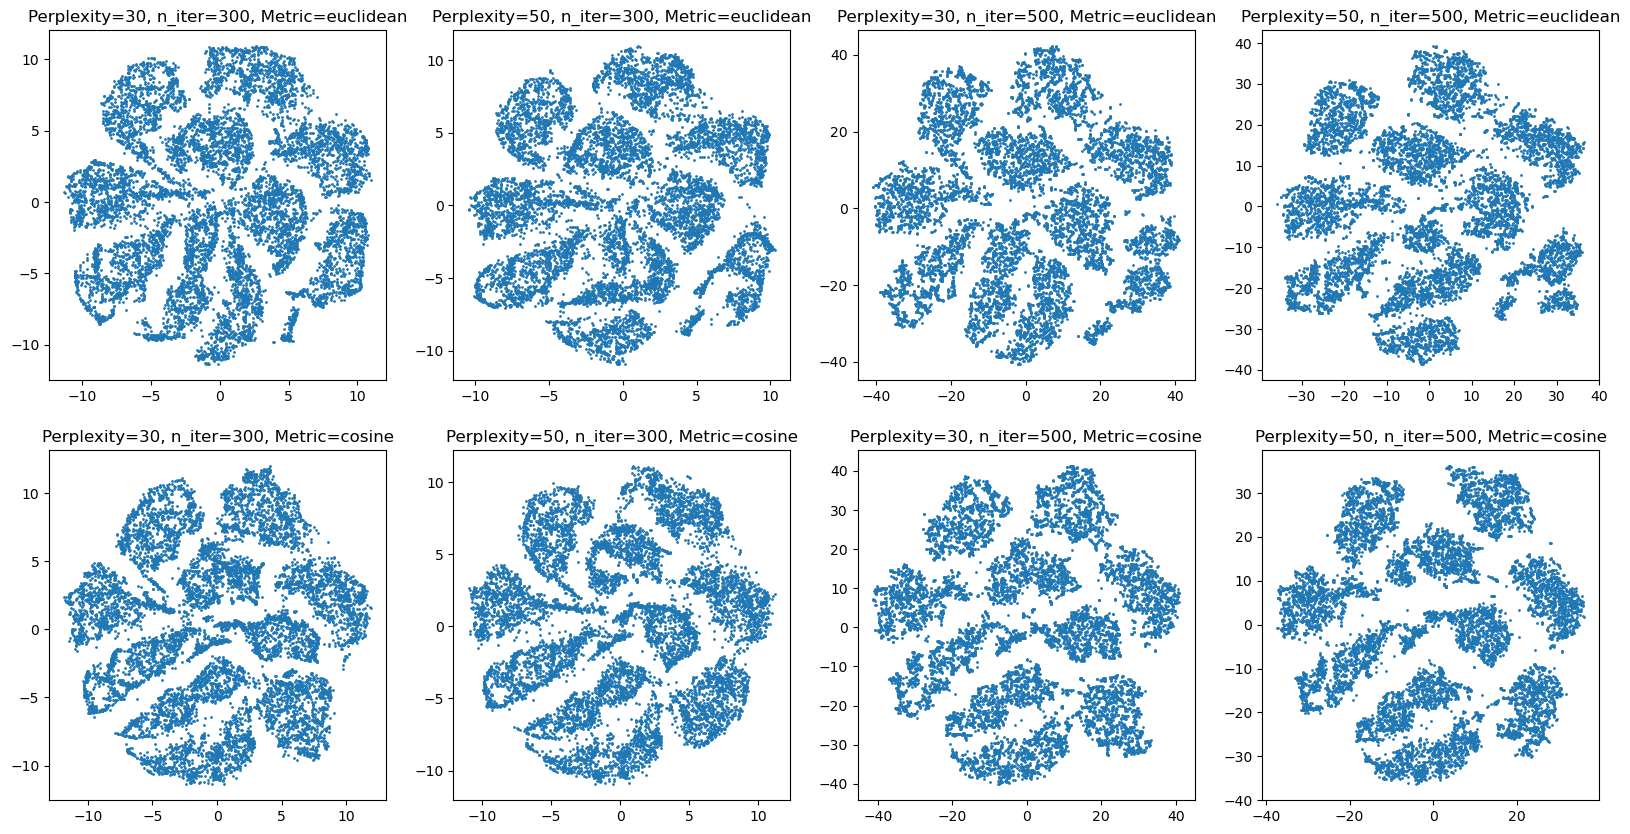

In [71]:
# Perform t-SNE with different parameters and plot the results
plt.figure(figsize=(20, 10))
for i, params in enumerate(tsne_params):
    tsne = TSNE(n_components=2, perplexity=params['perplexity'], n_iter=params['n_iter'], metric=params['metric'])
    data_tsne_2 = tsne.fit_transform(data_pca_2)
    
    plt.subplot(2, 4, i+1)
    plt.scatter(data_tsne_2[:, 0], data_tsne_2[:, 1], s=1)
    plt.title(f"Perplexity={params['perplexity']}, n_iter={params['n_iter']}, Metric={params['metric']}")
plt.show()

## Visualization for n component 40

In [96]:
# Select the best t-SNE parameters based on visual inspection or clustering results above
# Perform t-SNE with chosen parameters
tsne = TSNE(n_components=2, perplexity=50, n_iter=500, metric='euclidean')
data_tsne = tsne.fit_transform(data_pca)


# Perform clustering (using the best model: Agglomerative Clustering with 'average' linkage)
clustering = AgglomerativeClustering(n_clusters=10, linkage='average')
labels = clustering.fit_predict(data_pca)

# Define Roman digits corresponding to clusters
roman_digits = ['I', 'II', 'III',]
roman_digits = ['I', 'II', 'III', 'IV', 'V', 'VI', 'VII', 'VIII', 'IX', 'X']
set(labels)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

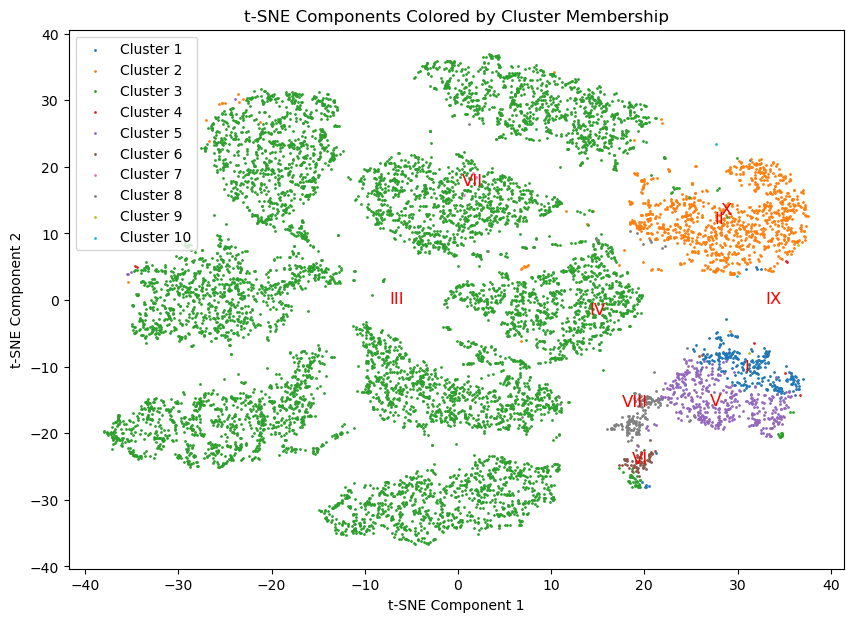

In [98]:
# Calculate centroids of clusters in t-SNE space
centroids = np.array([data_tsne[labels == i].mean(axis=0) for i in range(10)])

# Plot the t-SNE components with cluster membership
plt.figure(figsize=(10, 7))
for i in range(10):
    plt.scatter(data_tsne[labels == i, 0], data_tsne[labels == i, 1], s=1, label=f'Cluster {i+1}')
    plt.text(centroids[i, 0], centroids[i, 1], roman_digits[i], fontsize=12, ha='center', va='center', color='red')
plt.legend()
plt.title('t-SNE Components Colored by Cluster Membership')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


## Visualization for n_component 100

In [90]:
#roman_digits = list(labels)
# Select the best t-SNE parameters based on visual inspection or clustering results above
# Perform t-SNE with chosen parameters
tsne = TSNE(n_components=2, perplexity=50, n_iter=500, metric='cosine')
data_tsne_2 = tsne.fit_transform(data_pca_2)


# Perform clustering (using the best model: Agglomerative Clustering with 'average' linkage)
clustering_2 = KMeans(n_clusters=10)
labels_2 = clustering_2.fit_predict(data_pca_2)

# Define Roman digits corresponding to clusters
roman_digits = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
set(labels_2)


{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [81]:
set(labels_2)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [91]:
# Calculate centroids of clusters in t-SNE space
centroids_2 = np.array([data_tsne_2[labels_2 == i].mean(axis=0) for i in range(10)])
print(centroids_2.shape)
centroids_2

(10, 2)


array([[ -6.553514  , -23.688019  ],
       [ 10.422873  ,  -1.3057415 ],
       [ -0.26804996,  14.990945  ],
       [ 27.535538  ,   6.8259897 ],
       [  3.6578662 , -15.413643  ],
       [-24.594677  ,   5.000169  ],
       [-21.94445   , -10.165203  ],
       [ 23.897839  , -17.317783  ],
       [-16.105612  ,  23.02459   ],
       [ 14.856051  ,  26.775295  ]], dtype=float32)

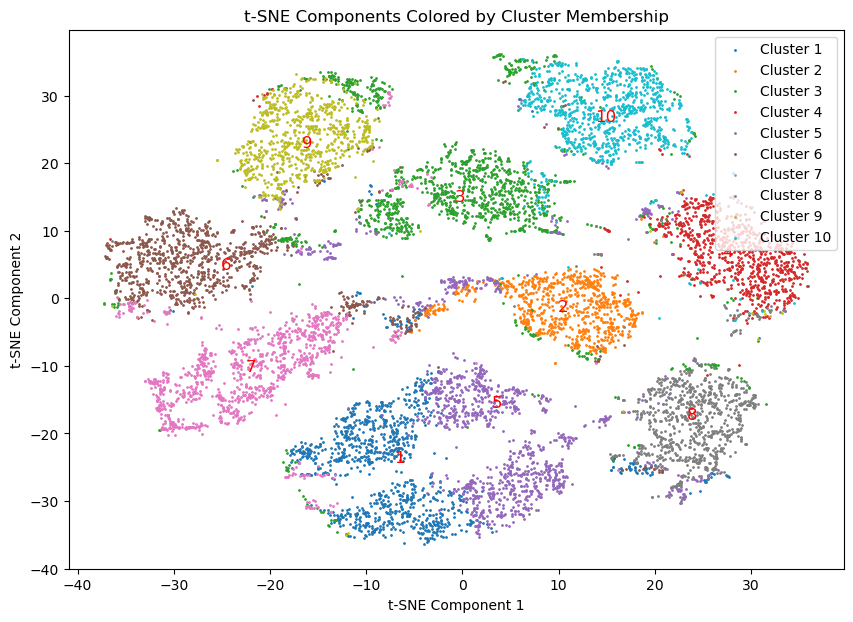

In [92]:

# Plot the t-SNE components with cluster membership
plt.figure(figsize=(10, 7))
for i in range(10):
    plt.scatter(data_tsne_2[labels_2 == i, 0], data_tsne_2[labels_2 == i, 1], s=1, label=f'Cluster {i+1}')
    plt.text(centroids_2[i, 0], centroids_2[i, 1], roman_digits[i], fontsize=12, ha='center', va='center', color='red')
plt.legend()
plt.title('t-SNE Components Colored by Cluster Membership')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


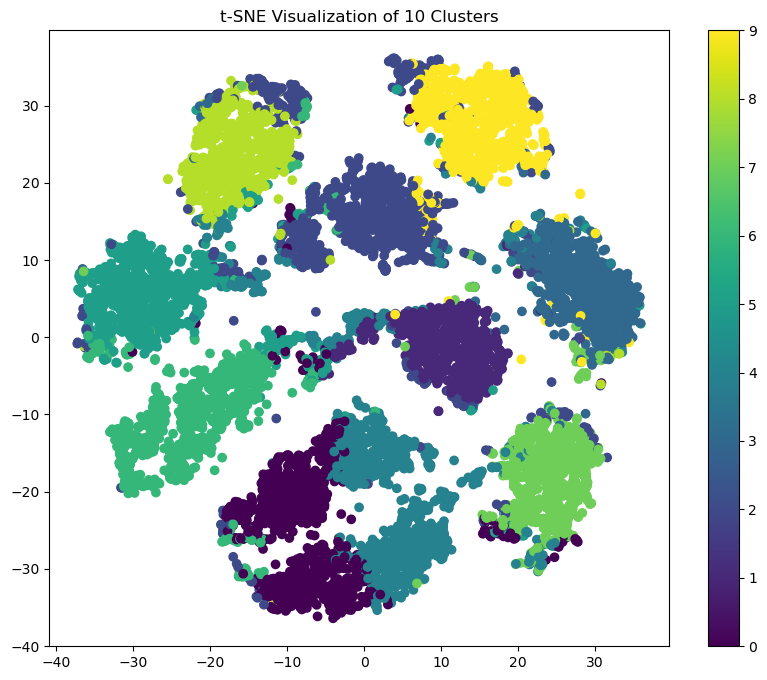

In [93]:
#t-SNE Visualization of Clusters
plt.figure(figsize=(10, 8))
plt.scatter(data_tsne_2[:, 0], data_tsne_2[:, 1], c=labels_2)
plt.title('t-SNE Visualization of 10 Clusters')
plt.colorbar()
plt.show()

In [94]:
centroids_2

array([[ -6.553514  , -23.688019  ],
       [ 10.422873  ,  -1.3057415 ],
       [ -0.26804996,  14.990945  ],
       [ 27.535538  ,   6.8259897 ],
       [  3.6578662 , -15.413643  ],
       [-24.594677  ,   5.000169  ],
       [-21.94445   , -10.165203  ],
       [ 23.897839  , -17.317783  ],
       [-16.105612  ,  23.02459   ],
       [ 14.856051  ,  26.775295  ]], dtype=float32)

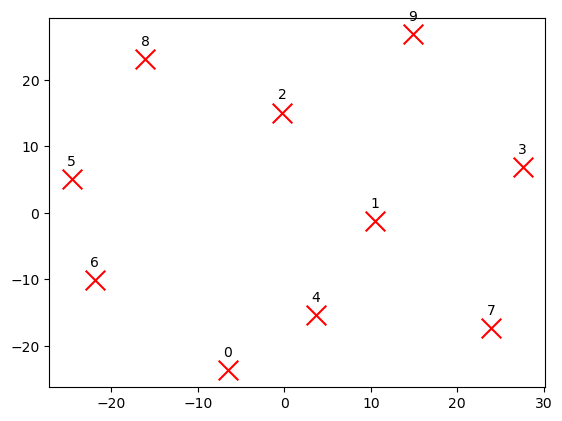

In [95]:
# Calculating and displaying the centroid

#centroids_2 = np.array([data_tsne_2[labels == i].mean(axis=0) for i in range(3)])




## Best Visualization of Clusters
After experimenting with different t-SNE parameters and clustering models, the plot that provides the best visualization is the one using KMeans Clustering with ‘n=10’  and 
**t-SNE with perplexity=50, n_iter=500, and metric=‘cosine’.**


The Alglomerative achieved the highest silhouette score of **0.19** and KMeans with n=10 **0.12** which is a bit lower but performed better in clustering, indicating well-defined and separated clusters.

## Conclusions
After evaluating several clustering models, the best performing model was **KMeans with n=10**, which achieved a silhouette score of **0.12**. This indicates a moderate level of separation between the clusters.

The t-SNE visualization provides a clear indication of how well the clusters are formed. The clusters appear distinct, Although there were some very few overlapping for some of the Classes which can slightly lead to a misclassification hence classification cant be a 100% accurate



## Hyperparameter  Choices for TSNE
Best
- t-SNE Parameters:
Perplexity: 50
Number of Iterations (n_iter): 500
Metric: Cosine

We also tried
- t-SNE Parameters:
Perplexity: 30
Number of Iterations (n_iter): 500
Metric: Elucidean

This combination provided the best visualization with well-separated clusters and the highest silhouette score of 0.12 using KMeans with n=10. we can also see the visualization of the centriod, enhancing the interpretability of the plot.

